<a href="https://colab.research.google.com/github/jocarocf/IA/blob/master/Clase06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:

# Importamos las librerias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb


# Esta linea permite que los graficos sean renderizados directamente en nuestro Notebook
## Carguemos en un pandas dataframe nuestra base de datos
%matplotlib inline


 
movies = pd.read_csv('https://raw.githubusercontent.com/JuanPabloMF/datasets-platzi-course/970cbea8b3598eed46ff99b3530c6986c7e1ebb3/datasets/peliculas.csv')
type(movies)

#Permite  ver el dataset de movies
movies.head()

# Cuantas lineas y columnas tiene nuestro dataframe
### Un dataframe es una estructura de datos que se compone de los elementos siguientes
movies.shape

#visualizemos las columnas opcion1
movies.columns

#se parece a numpy range tengo todos los numeros del 1 ald 5043
movies.index

columna1 = movies['movie_title']
columna1.head()

#muestra toda un fila
linea = movies.loc[10,:]
linea

#visualizemos las columnas opcion 2
movies.loc[:,'movie_title'].head()

#inspeccionar datos, vista general nos da todas las columnas
#elementos no nulos, el tipo de columna
movies.info()


 




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   movie_title                5043 non-null   object 
 1   title_year                 4935 non-null   float64
 2   color                      5024 non-null   object 
 3   aspect_ratio               4714 non-null   float64
 4   duration                   5028 non-null   float64
 5   language                   5031 non-null   object 
 6   country                    5038 non-null   object 
 7   duration.1                 5028 non-null   float64
 8   genres                     5043 non-null   object 
 9   content_rating             4740 non-null   object 
 10  plot_keywords              4890 non-null   object 
 11  director_name              4939 non-null   object 
 12  actor_1_name               5036 non-null   object 
 13  actor_2_name               5030 non-null   objec

In [30]:
# columnas númericas y columnas de texto
movies.dtypes

# columnas para ver si son flotantes
movies.dtypes == float

movies.dtypes == int


num = (movies.dtypes == float) | (movies.dtypes == int)
num

num.index


for el in num.index:
    print(el)

# itera sobre num index que son los nombres de las columanas , if num[c] retorna un falso o un verdadero.
num_cols = [c for c in num.index if num[c]]
num_cols

movie_title
title_year
color
aspect_ratio
duration
language
country
duration.1
genres
content_rating
plot_keywords
director_name
actor_1_name
actor_2_name
actor_3_name
cast_total_facebook_likes
budget
imdb_score
gross


['title_year',
 'aspect_ratio',
 'duration',
 'duration.1',
 'cast_total_facebook_likes',
 'budget',
 'imdb_score',
 'gross']

In [31]:
movies.dtypes == object

obj = (movies.dtypes == object)
obj_cols = [c for c in obj.index if obj[c]]

obj_cols

['movie_title',
 'color',
 'language',
 'country',
 'genres',
 'content_rating',
 'plot_keywords',
 'director_name',
 'actor_1_name',
 'actor_2_name',
 'actor_3_name']

In [35]:
#ver estadisticas de las columna numericas
movies_num = movies[num_cols]
movies_num

movies_num.describe()



,title_year,aspect_ratio,duration,duration.1,cast_total_facebook_likes,budget,imdb_score,gross
count,4935.000000,4714.000000,5028.000000,5028.000000,5043.000000,4.551000e+03,5043.000000,4.159000e+03
mean,2002.470517,2.220403,107.201074,107.201074,9699.063851,3.975262e+07,6.442138,4.846841e+07
std,12.474599,1.385113,25.197441,25.197441,18163.799124,2.061149e+08,1.125116,6.845299e+07
min,1916.000000,1.180000,7.000000,7.000000,0.000000,2.180000e+02,1.600000,1.620000e+02
25%,1999.000000,1.850000,93.000000,93.000000,1411.000000,6.000000e+06,5.800000,5.340988e+06
50%,2005.000000,2.350000,103.000000,103.000000,3090.000000,2.000000e+07,6.600000,2.551750e+07
75%,2011.000000,2.350000,118.000000,118.000000,13756.500000,4.500000e+07,7.200000,6.230944e+07
max,2016.000000,16.000000,511.000000,511.000000,656730.000000,1.221550e+10,9.500000,7.605058e+08


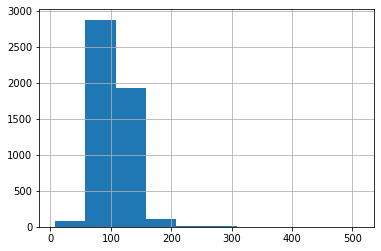

In [36]:
#duracion
movies_num['duration'].hist()

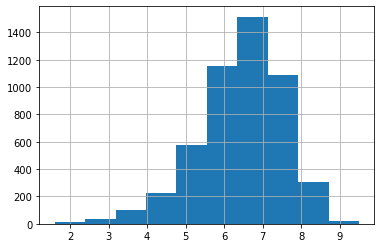

In [37]:
#puntaje
movies_num['imdb_score'].hist()

In [0]:
#Presupuesto = bugget
movies_num['budget'].hist()

In [39]:
(movies_num['budget'] > 1e9)

0       False
1       False
2       False
3       False
4       False
        ...  
5038    False
5039    False
5040    False
5041    False
5042    False
Name: budget, Length: 5043, dtype: bool

In [40]:
#booleanfilter
mask = (movies_num['budget'] > 1e9)


movies[mask]

,movie_title,title_year,color,aspect_ratio,duration,language,country,duration.1,genres,content_rating,plot_keywords,director_name,actor_1_name,actor_2_name,actor_3_name,cast_total_facebook_likes,budget,imdb_score,gross
2323,Princess Mononoke,1997.0,Color,1.85,134.0,Japanese,Japan,134.0,Adventure|Animation|Fantasy,PG-13,anime|cult film|forest|princess|studio ghibli,Hayao Miyazaki,Minnie Driver,Jada Pinkett Smith,Billy Crudup,2710,2.400000e+09,8.4,2298191.0
2334,Steamboy,2004.0,Color,1.85,103.0,Japanese,Japan,103.0,Action|Adventure|Animation|Family|Sci-Fi|Thriller,PG-13,19th century|ball|boy|inventor|steam,Katsuhiro Ôtomo,William Hootkins,Robin Atkin Downes,Rosalind Ayres,991,2.127520e+09,6.9,410388.0
2988,The Host,2006.0,Color,1.85,110.0,Korean,South Korea,110.0,Comedy|Drama|Horror|Sci-Fi,R,daughter|han river|monster|river|seoul,Joon-ho Bong,Doona Bae,Kang-ho Song,Ah-sung Ko,1173,1.221550e+10,7.0,2201412.0
3005,Fateless,2005.0,Color,2.35,134.0,Hungarian,Hungary,134.0,Drama|Romance|War,R,bus|death|gay slur|hatred|jewish,Lajos Koltai,Marcell Nagy,Péter Fancsikai,Bálint Péntek,11,2.500000e+09,7.1,195888.0
3423,Akira,1988.0,Color,1.85,124.0,Japanese,Japan,124.0,Action|Animation|Sci-Fi,R,based on manga|biker gang|gifted child|post th...,Katsuhiro Ôtomo,Mitsuo Iwata,Takeshi Kusao,Tesshô Genda,28,1.100000e+09,8.1,439162.0
3859,Lady Vengeance,2005.0,Color,2.35,112.0,Korean,South Korea,112.0,Crime|Drama,R,cake|christian|lesbian sex|oral sex|pregnant s...,Chan-wook Park,Min-sik Choi,Yeong-ae Lee,Hye-jeong Kang,907,4.200000e+09,7.7,211667.0


In [43]:
pd.read_csv('https://raw.githubusercontent.com/JuanPabloMF/datasets-platzi-course/master/datasets/thenumbers.csv')

,Unnamed: 0,movie_name,domestic_gross,movie_link,production_budget,release_date,worldwide_gross,movie_title
0,0,Avatar,760507625,http://www.the-numbers.com/movie/Avatar#tab=su...,425000000,12/18/2009,2783918982,Avatar
1,1,Star Wars Ep. VII: The Force Awakens,936662225,http://www.the-numbers.com/movie/Star-Wars-Ep-...,306000000,12/18/2015,2058662225,Star Wars: Episode VII - The Force Awakens ...
2,2,Pirates of the Caribbean: At World's End,309420425,http://www.the-numbers.com/movie/Pirates-of-th...,300000000,5/24/2007,963420425,Pirates of the Caribbean: At World's End
3,3,Spectre,200074175,http://www.the-numbers.com/movie/Spectre#tab=s...,300000000,11/6/2015,879620923,Spectre
4,4,The Dark Knight Rises,448139099,http://www.the-numbers.com/movie/Dark-Knight-R...,275000000,7/20/2012,1084439099,The Dark Knight Rises
...,...,...,...,...,...,...,...,...
4336,5157,The Mongol King,900,http://www.the-numbers.com/movie/Mongol-King-T...,7000,1/1/2004,900,The Mongol King
4337,5160,Signed Sealed Delivered,0,http://www.the-numbers.com/movie/Signed-Sealed...,5000,9/29/2015,0,Signed Sealed Delivered
4338,5161,Shanghai Calling,10443,http://www.the-numbers.com/movie/Shanghai-Call...,3967,2/15/2013,10443,Shanghai Calling
4339,5162,A Plague So Pleasant,0,http://www.the-numbers.com/movie/Plague-So-Ple...,1400,9/29/2015,0,A Plague So Pleasant


In [49]:
financials =  pd.read_csv('https://raw.githubusercontent.com/JuanPabloMF/datasets-platzi-course/master/datasets/thenumbers.csv')

financials = financials[['movie_title','production_budget','worldwide_gross']]

financials.shape

movies.shape

financials

,movie_title,production_budget,worldwide_gross
0,Avatar,425000000,2783918982
1,Star Wars: Episode VII - The Force Awakens ...,306000000,2058662225
2,Pirates of the Caribbean: At World's End,300000000,963420425
3,Spectre,300000000,879620923
4,The Dark Knight Rises,275000000,1084439099
...,...,...,...
4336,The Mongol King,7000,900
4337,Signed Sealed Delivered,5000,0
4338,Shanghai Calling,3967,10443
4339,A Plague So Pleasant,1400,0


In [50]:
movies['movie_title']

0                                                 Avatar 
1               Pirates of the Caribbean: At World's End 
2                                                Spectre 
3                                  The Dark Knight Rises 
4       Star Wars: Episode VII - The Force Awakens    ...
                              ...                        
5038                             Signed Sealed Delivered 
5039                           The Following             
5040                                A Plague So Pleasant 
5041                                    Shanghai Calling 
5042                                   My Date with Drew 
Name: movie_title, Length: 5043, dtype: object

In [52]:
movies_num

,title_year,aspect_ratio,duration,duration.1,cast_total_facebook_likes,budget,imdb_score,gross
0,2009.0,1.78,178.0,178.0,4834,237000000.0,7.9,760505847.0
1,2007.0,2.35,169.0,169.0,48350,300000000.0,7.1,309404152.0
2,2015.0,2.35,148.0,148.0,11700,245000000.0,6.8,200074175.0
3,2012.0,2.35,164.0,164.0,106759,250000000.0,8.5,448130642.0
4,NaN,NaN,NaN,NaN,143,NaN,7.1,NaN
...,...,...,...,...,...,...,...,...
5038,2013.0,NaN,87.0,87.0,2283,NaN,7.7,NaN
5039,NaN,16.00,43.0,43.0,1753,NaN,7.5,NaN
5040,2013.0,NaN,76.0,76.0,0,1400.0,6.3,NaN
5041,2012.0,2.35,100.0,100.0,2386,NaN,6.3,10443.0


In [0]:
#le meten a movies_num la columna movies_title para hacer el merge por esta columna como key
movies_num = pd.concat([movies_num, movies['movie_title']],axis=1) #axis 1 para agregar COLUMNA

In [0]:
movies_num = movies_num.drop('movie_title',axis=1)

In [78]:
movies_num

,title_year,aspect_ratio,duration,duration.1,cast_total_facebook_likes,budget,imdb_score,gross,movie_title
0,2009.0,1.78,178.0,178.0,4834,237000000.0,7.9,760505847.0,Avatar
1,2007.0,2.35,169.0,169.0,48350,300000000.0,7.1,309404152.0,Pirates of the Caribbean: At World's End
2,2015.0,2.35,148.0,148.0,11700,245000000.0,6.8,200074175.0,Spectre
3,2012.0,2.35,164.0,164.0,106759,250000000.0,8.5,448130642.0,The Dark Knight Rises
4,NaN,NaN,NaN,NaN,143,NaN,7.1,NaN,Star Wars: Episode VII - The Force Awakens ...
...,...,...,...,...,...,...,...,...,...
5038,2013.0,NaN,87.0,87.0,2283,NaN,7.7,NaN,Signed Sealed Delivered
5039,NaN,16.00,43.0,43.0,1753,NaN,7.5,NaN,The Following
5040,2013.0,NaN,76.0,76.0,0,1400.0,6.3,NaN,A Plague So Pleasant
5041,2012.0,2.35,100.0,100.0,2386,NaN,6.3,10443.0,Shanghai Calling


In [0]:

gross_opening = pd.read_csv('https://raw.githubusercontent.com/JuanPabloMF/datasets-platzi-course/master/datasets/opening_df.csv')
gross_opening = gross_opening.drop('Unnamed: 0',axis=1)

In [65]:
financials

,movie_title,production_budget,worldwide_gross
0,Avatar,425000000,2783918982
1,Star Wars: Episode VII - The Force Awakens ...,306000000,2058662225
2,Pirates of the Caribbean: At World's End,300000000,963420425
3,Spectre,300000000,879620923
4,The Dark Knight Rises,275000000,1084439099
...,...,...,...
4336,The Mongol King,7000,900
4337,Signed Sealed Delivered,5000,0
4338,Shanghai Calling,3967,10443
4339,A Plague So Pleasant,1400,0


In [80]:
movies_v2 = pd.merge(financials,movies_num,on='movie_title',how='left') #left llaves de financials
movies_v2

,movie_title,production_budget,worldwide_gross,title_year,aspect_ratio,duration,duration.1,cast_total_facebook_likes,budget,imdb_score,gross
0,Avatar,425000000,2783918982,2009.0,1.78,178.0,178.0,4834,237000000.0,7.9,760505847.0
1,Star Wars: Episode VII - The Force Awakens ...,306000000,2058662225,NaN,NaN,NaN,NaN,143,NaN,7.1,NaN
2,Pirates of the Caribbean: At World's End,300000000,963420425,2007.0,2.35,169.0,169.0,48350,300000000.0,7.1,309404152.0
3,Spectre,300000000,879620923,2015.0,2.35,148.0,148.0,11700,245000000.0,6.8,200074175.0
4,The Dark Knight Rises,275000000,1084439099,2012.0,2.35,164.0,164.0,106759,250000000.0,8.5,448130642.0
...,...,...,...,...,...,...,...,...,...,...,...
4380,The Mongol King,7000,900,2005.0,NaN,84.0,84.0,93,3250.0,7.8,NaN
4381,Signed Sealed Delivered,5000,0,2013.0,NaN,87.0,87.0,2283,NaN,7.7,NaN
4382,Shanghai Calling,3967,10443,2012.0,2.35,100.0,100.0,2386,NaN,6.3,10443.0
4383,A Plague So Pleasant,1400,0,2013.0,NaN,76.0,76.0,0,1400.0,6.3,NaN


In [81]:

movies_v2.shape

(4385, 11)

In [85]:
movies_v2.notnull().apply(pd.Series.value_counts) #cuantas cuantos falso hay en un dataset

,movie_title,production_budget,worldwide_gross,title_year,aspect_ratio,duration,duration.1,cast_total_facebook_likes,budget,imdb_score,gross
False,NaN,NaN,NaN,27,274,13,13,NaN,335,NaN,671
True,4385.0,4385.0,4385.0,4358,4111,4372,4372,4385.0,4050,4385.0,3714


In [61]:
financials

,movie_title,production_budget,worldwide_gross
0,Avatar,425000000,2783918982
1,Star Wars: Episode VII - The Force Awakens ...,306000000,2058662225
2,Pirates of the Caribbean: At World's End,300000000,963420425
3,Spectre,300000000,879620923
4,The Dark Knight Rises,275000000,1084439099
...,...,...,...
4336,The Mongol King,7000,900
4337,Signed Sealed Delivered,5000,0
4338,Shanghai Calling,3967,10443
4339,A Plague So Pleasant,1400,0


In [86]:
(movies_v2 != 0).apply(pd.Series.value_counts)

,movie_title,production_budget,worldwide_gross,title_year,aspect_ratio,duration,duration.1,cast_total_facebook_likes,budget,imdb_score,gross
False,NaN,NaN,281,NaN,NaN,NaN,NaN,27,NaN,NaN,NaN
True,4385.0,4385.0,4104,4385.0,4385.0,4385.0,4385.0,4358,4385.0,4385.0,4385.0


In [88]:
available = ((movies_v2 != 0) & (movies_v2.notnull()))

available

,movie_title,production_budget,worldwide_gross,title_year,aspect_ratio,duration,duration.1,cast_total_facebook_likes,budget,imdb_score,gross
0,True,True,True,True,True,True,True,True,True,True,True
1,True,True,True,False,False,False,False,True,False,True,False
2,True,True,True,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...
4380,True,True,True,True,False,True,True,True,True,True,False
4381,True,True,False,True,False,True,True,True,False,True,False
4382,True,True,True,True,True,True,True,True,False,True,True
4383,True,True,False,True,False,True,True,False,True,True,False


In [89]:
#cuantas lineas tienen valores falsos
available.all(axis=1).value_counts()

True     3408
False     977
dtype: int64

In [0]:
#cuando la variable objetivo esta available que no sea nan o nulo
mask = available['worldwide_gross']

In [91]:
mask

0        True
1        True
2        True
3        True
4        True
        ...  
4380     True
4381    False
4382     True
4383    False
4384     True
Name: worldwide_gross, Length: 4385, dtype: bool

In [0]:
movies_v2 = movies_v2[mask]

In [95]:
movies_v2 = movies_v2.drop('movie_title',axis=1)


KeyError: ignored

In [96]:
movies_v2

,production_budget,worldwide_gross,title_year,aspect_ratio,duration,duration.1,cast_total_facebook_likes,budget,imdb_score,gross
0,425000000,2783918982,2009.0,1.78,178.0,178.0,4834,237000000.0,7.9,760505847.0
1,306000000,2058662225,NaN,NaN,NaN,NaN,143,NaN,7.1,NaN
2,300000000,963420425,2007.0,2.35,169.0,169.0,48350,300000000.0,7.1,309404152.0
3,300000000,879620923,2015.0,2.35,148.0,148.0,11700,245000000.0,6.8,200074175.0
4,275000000,1084439099,2012.0,2.35,164.0,164.0,106759,250000000.0,8.5,448130642.0
...,...,...,...,...,...,...,...,...,...,...
4378,7000,841926,2004.0,1.85,77.0,77.0,368,7000.0,7.0,424760.0
4379,7000,71644,2005.0,NaN,80.0,80.0,0,7000.0,6.3,70071.0
4380,7000,900,2005.0,NaN,84.0,84.0,93,3250.0,7.8,NaN
4382,3967,10443,2012.0,2.35,100.0,100.0,2386,NaN,6.3,10443.0


In [0]:
movies_v2 = movies_v2.drop('duration',axis=1)

In [98]:
movies_v2 = movies_v2.drop('gross',axis=1) 
((movies_v2 != 0) & (movies_v2.notnull())).worldwide_gross.value_counts()

True    4104
Name: worldwide_gross, dtype: int64

In [99]:
movies_v2

,production_budget,worldwide_gross,title_year,aspect_ratio,duration.1,cast_total_facebook_likes,budget,imdb_score
0,425000000,2783918982,2009.0,1.78,178.0,4834,237000000.0,7.9
1,306000000,2058662225,NaN,NaN,NaN,143,NaN,7.1
2,300000000,963420425,2007.0,2.35,169.0,48350,300000000.0,7.1
3,300000000,879620923,2015.0,2.35,148.0,11700,245000000.0,6.8
4,275000000,1084439099,2012.0,2.35,164.0,106759,250000000.0,8.5
...,...,...,...,...,...,...,...,...
4378,7000,841926,2004.0,1.85,77.0,368,7000.0,7.0
4379,7000,71644,2005.0,NaN,80.0,0,7000.0,6.3
4380,7000,900,2005.0,NaN,84.0,93,3250.0,7.8
4382,3967,10443,2012.0,2.35,100.0,2386,NaN,6.3


In [0]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

In [0]:
values = imputer.fit_transform(movies_v2)

In [111]:
values

array([[4.25000000e+08, 2.78391898e+09, 2.00900000e+03, ...,
        4.83400000e+03, 2.37000000e+08, 7.90000000e+00],
       [3.06000000e+08, 2.05866222e+09, 2.00213073e+03, ...,
        1.43000000e+02, 4.04553863e+07, 7.10000000e+00],
       [3.00000000e+08, 9.63420425e+08, 2.00700000e+03, ...,
        4.83500000e+04, 3.00000000e+08, 7.10000000e+00],
       ...,
       [7.00000000e+03, 9.00000000e+02, 2.00500000e+03, ...,
        9.30000000e+01, 3.25000000e+03, 7.80000000e+00],
       [3.96700000e+03, 1.04430000e+04, 2.01200000e+03, ...,
        2.38600000e+03, 4.04553863e+07, 6.30000000e+00],
       [1.10000000e+03, 1.81041000e+05, 2.00400000e+03, ...,
        1.63000000e+02, 1.10000000e+03, 6.60000000e+00]])

In [0]:
x = pd.DataFrame(values)

In [0]:
x.index = movies_v2.index

In [141]:
x.head()

,0,1,2,3,4,5,6,7
0,425000000.0,2.783919e+09,2009.000000,1.780000,178.000000,4834.0,2.370000e+08,7.9
1,306000000.0,2.058662e+09,2002.130733,2.126976,108.577186,143.0,4.045539e+07,7.1
2,300000000.0,9.634204e+08,2007.000000,2.350000,169.000000,48350.0,3.000000e+08,7.1
3,300000000.0,8.796209e+08,2015.000000,2.350000,148.000000,11700.0,2.450000e+08,6.8
4,275000000.0,1.084439e+09,2012.000000,2.350000,164.000000,106759.0,2.500000e+08,8.5


In [162]:
x.to_csv('https://raw.githubusercontent.com/jocarocf/IA/x.csv',index=False)

HTTPError: ignored

In [133]:

x.to_csv('../vol/intermediate_results/X.csv',index=False)

FileNotFoundError: ignored